In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... - done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=e6a0a9a4eeeb5f05ac314a371e2aa20a3b93663e73b7a98aa3f057bb55d540ab
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [2]:
import numpy as np 
import pandas as pd 
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
articles = ['Apple','MacBook','Time Cook', 'Elon', 'Twitter', 'verified account', 'COVID', 'vaccine', 'quarantine']

In [4]:
wikis = []
titles = []

for article in articles:
    wikis.append(wikipedia.page(article).content)
    titles.append(article)

In [5]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wikis)

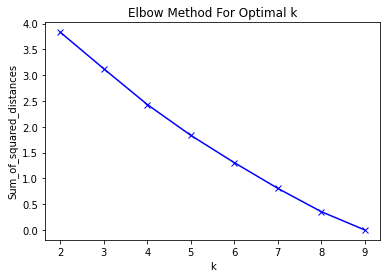

In [6]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()